<a href="https://colab.research.google.com/github/VarunsaiManikya/Employee-Burnout-data-analysis/blob/main/Burnoyt_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

# Loading Data

In [6]:
dataset_path='/content/drive/MyDrive/employee_burnout_analysis (1).xlsx'

In [7]:
burn_data=pd.read_excel(dataset_path)
burn_data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [12]:
# To find the shape of the data
burn_data.shape

(22750, 9)

In [8]:
#used to find top 5 data
burn_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [9]:
# info of the data
burn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [10]:
# to find the mean, min , standard deviation of data
burn_data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [13]:
# to find the null values
burn_data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [15]:
# checking the duplicate values
burn_data.duplicated().sum()

0

In [19]:
# filling the null values using the mean
burn_data['Resource Allocation'].fillna(burn_data['Resource Allocation'].mean(),inplace=True)
burn_data['Mental Fatigue Score'].fillna(burn_data['Mental Fatigue Score'].mean(),inplace=True)
burn_data['Burn Rate'].fillna(burn_data['Burn Rate'].mean(),inplace=True)

In [20]:
#checking whether still null values exists or not
burn_data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [21]:
# dropping the coloumn employee id as it is not used
burn_data=burn_data.drop(["Employee ID"],axis=1)

In [22]:
#finding the correlation of the data
burn_data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


# Data Visualization

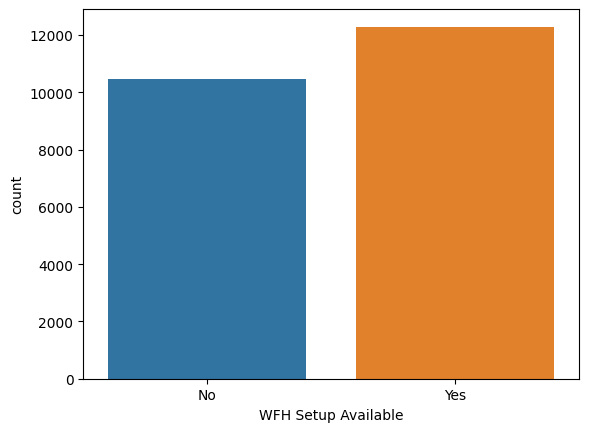

In [25]:
#countplot
sns.countplot(data=burn_data, x='WFH Setup Available');

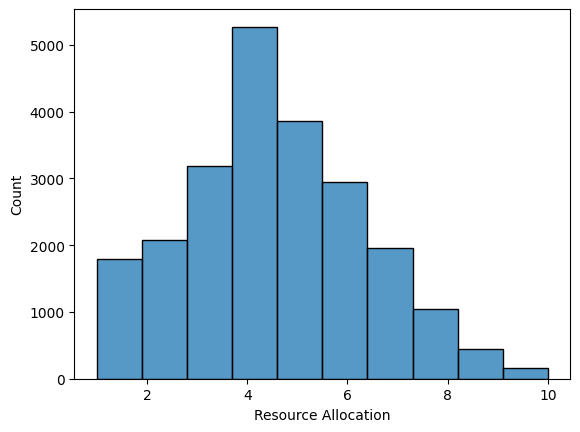

In [26]:
#histogram plot
sns.histplot(data=burn_data, x='Resource Allocation', bins=10);

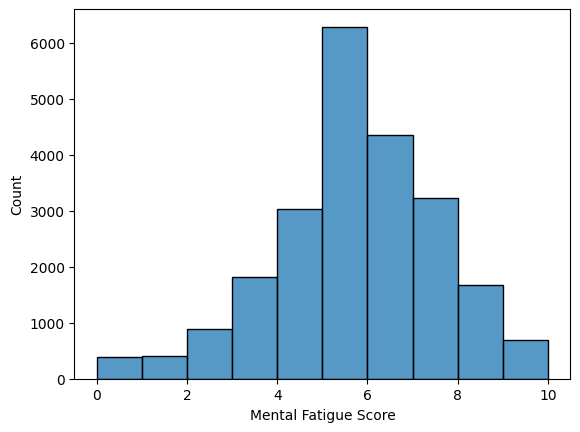

In [27]:
# histogram plot for mental fatigue score
sns.histplot(data=burn_data, x='Mental Fatigue Score', bins=10);

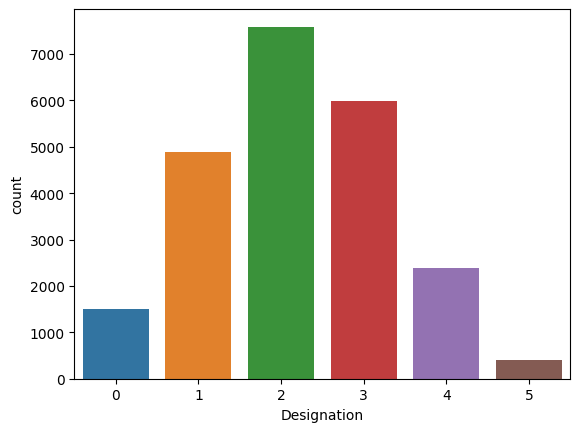

In [28]:
#count plot for designation
sns.countplot(data=burn_data, x='Designation');

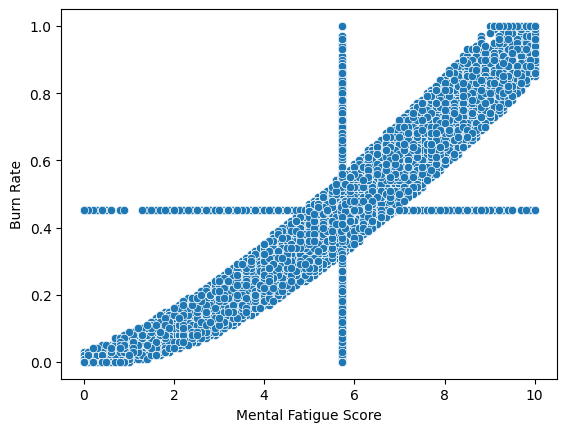

In [29]:
#scatter plot
sns.scatterplot(data=burn_data, x='Mental Fatigue Score', y='Burn Rate');

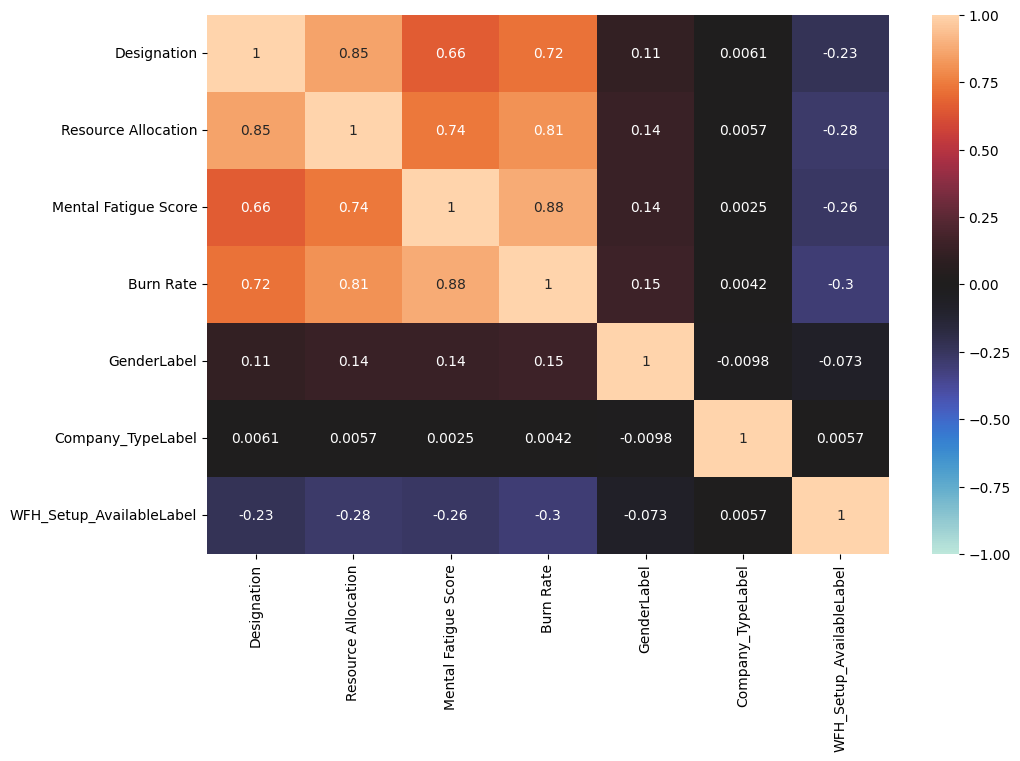

In [125]:
#heatmap for the data
plt.figure(figsize=(11,7))
corr = burn_data.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [124]:
fig=px.line(burn_data,y='Mental Fatigue Score',color='Designation',title='Mental Fatigue vs designation')
fig.update_layout(bargap=0.1)
fig.show()

In [45]:
#bar plot
fig=px.line(burn_data,y="Burn Rate",color="Gender",title="Burn Rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

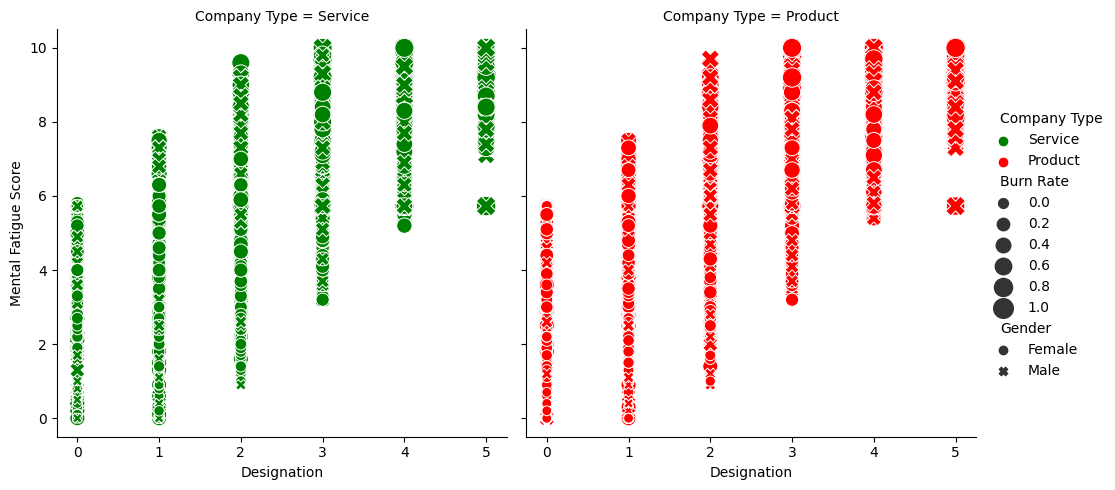

In [46]:
sns.relplot(
    data=burn_data,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",
    palette=["g","r"],sizes=(50,200)
)

# Label Encoding

In [51]:
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()
# Label encoding and assign in new variable

In [54]:
burn_data['GenderLabel'] = Label_encode.fit_transform(burn_data['Gender'].values)
burn_data['Company_TypeLabel'] = Label_encode.fit_transform(burn_data['Company Type'].values)
burn_data['WFH_Setup_AvailableLabel']=Label_encode.fit_transform(burn_data['WFH Setup Available'].values)
#Assigning new variable


In [58]:
gl=burn_data.groupby('Gender')
gl=gl['GenderLabel']
gl.first()
# checking the assigned value

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [59]:
ctl=burn_data.groupby('Company Type')
ctl=ctl['Company_TypeLabel']
ctl.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [61]:
wsa=burn_data.groupby('WFH Setup Available')
wsa=wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [62]:
burn_data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,1,0
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,1,1
2,2008-03-10,Female,Product,Yes,2,4.481398,5.8,0.49,0,0,1
3,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,1,1,1
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,0,1,0


# Feature Selection

In [63]:
#feature selection
Coloumns=['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=burn_data[Coloumns]
y=burn_data['Burn Rate']

In [64]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [65]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [68]:
#priniciple component Analysis
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca=pca.fit_transform(x)

print(x.shape)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

(22750, 6)
[0.78371089 0.11113597 0.03044541 0.02632422]
4


# Split Train Test

In [102]:
from re import X
#spliting the data for test and train
from sklearn.model_selection import train_test_split
X_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [94]:
from sklearn.metrics import r2_score

# Evaluating using Machine Learning Models

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca,y_train)

train_pred_rf= rf_model.predict(x_train_pca)
train_r2= r2_score(y_train,train_pred_rf)
test_pred_rf=rf_model.predict(x_test)
test_r2=r2_score(y_test,test_pred_rf)

#Accuracy Score
print("Accuracy score of train data: "+str(round(100*train_r2,4))+"%")
print("Accuracy score of test data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data: 91.1899%
Accuracy score of test data:83.8636%


In [116]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca,y_train)

train_pred_abr= abr_model.predict(x_train_pca)
train_r2= r2_score(y_train,train_pred_abr)
test_pred_abr=abr_model.predict(x_test)
test_r2=r2_score(y_test,test_pred_abr)

#Accuracy Score
print("Accuracy score of train data: "+str(round(100*train_r2,4))+"%")
print("Accuracy score of test data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data: 77.5788%
Accuracy score of test data:77.1557%


In [112]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_pca,y_train)

train_pred_lr= lr_model.predict(x_train_pca)
train_r2= r2_score(y_train,train_pred_lr)
test_pred_lr=lr_model.predict(x_test)
test_r2=r2_score(y_test,test_pred_lr)

#Accuracy Score
print("Accuracy score of train data: "+str(round(100*train_r2,4))+"%")
print("Accuracy score of test data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data: 83.1262%
Accuracy score of test data:82.9367%


In [113]:
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor()
knr_model.fit(X_train_pca,y_train)

train_pred_knr= knr_model.predict(x_train_pca)
train_r2= r2_score(y_train,train_pred_knr)
test_pred_knr=knr_model.predict(x_test)
test_r2=r2_score(y_test,test_pred_knr)

#Accuracy Score
print("Accuracy score of train data: "+str(round(100*train_r2,4))+"%")
print("Accuracy score of test data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data: 88.5301%
Accuracy score of test data:83.7166%


In [115]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train_pca,y_train)

train_pred_dtr= dtr_model.predict(x_train_pca)
train_r2= r2_score(y_train,train_pred_dtr)
test_pred_dtr=dtr_model.predict(x_test)
test_r2=r2_score(y_test,test_pred_dtr)

#Accuracy Score
dtr_acc=print("Accuracy score of train data: "+str(round(100*train_r2,4))+"%")
dtr_acc=print("Accuracy score of test data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data: 91.5736%
Accuracy score of test data:80.7649%


# RESULT

## From the above analytics we can say that the **DecisionTreeRegressor** and **RandomforestRegressor** has more Accuracy compared to another  ML models